---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)
Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

### Colab Setup

In [238]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/drive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  !pwd

We're running Colab
Colab: mounting Google drive on  /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Colab: making sure  /content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22  exists.

Colab: Changing directory to  /content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22
/content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22
/content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22


In [239]:
!pip install -r requirements.txt
!sudo apt-get install nano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
nano is already the newest version (2.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


See jQuery Terminal's [Features](https://terminal.jcubic.pl/)


In [240]:
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [241]:
#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Colab Shell',
      name: 'colab_demo',
      height: 250,
      prompt: 'colab > '
  });

\$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

In [242]:
!pwd
!cp -f ./resources/cws.py /usr/local/lib/python3.8/dist-packages/scaleogram

/content/drive/MyDrive/Colab Notebooks/Bakery_Sales_Project_WS22


This is example code for the bakery data. You DO NOT need to use this.

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scaleogram as scg 
import pywt


In [244]:
if IN_COLAB:
  DATASET_FOLDER = './data/dataset1/'
  DATA_FOLDER = './data/'
else:
  DATASET_FOLDER = './../data/dataset1/'
  DATA_FOLDER = './../data/'

SALES_DATA = 'sales.csv'
WEATHER_DATA = 'wheather.csv'
KIWO_DATA = 'kiwo.csv'

In [245]:
sales_df = pd.read_csv(os.path.join(DATASET_FOLDER, SALES_DATA))
sales_df

Date  Group       Sales
0      2013-07-01      1  148.828353
1      2013-07-02      1  159.793757
2      2013-07-03      1  111.885594
3      2013-07-04      1  168.864941
4      2013-07-05      1  171.280754
...           ...    ...         ...
10864  2018-12-22      6   66.737353
10865  2018-12-23      6   49.958196
10866  2018-12-24      6   46.130749
10867  2018-12-27      6   51.623140
10868  2018-12-28      6   35.220810

[10869 rows x 3 columns]

In [246]:
weather_df = pd.read_csv(os.path.join(DATASET_FOLDER, WEATHER_DATA))
weather_df

Date  Cloudiness  Temperature  Wind Speed  Weather Code
0     2012-01-01         8.0       9.8250          14          58.0
1     2012-01-02         7.0       7.4375          12           NaN
2     2012-01-03         8.0       5.5375          18          63.0
3     2012-01-04         4.0       5.6875          19          80.0
4     2012-01-05         6.0       5.3000          23          80.0
...          ...         ...          ...         ...           ...
2596  2019-07-28         3.0      23.3500          14           5.0
2597  2019-07-29         6.0      25.2500           7          61.0
2598  2019-07-30         7.0      20.7375           8          61.0
2599  2019-07-31         6.0      20.4500           7          61.0
2600  2019-08-01         5.0      21.0625           9          61.0

[2601 rows x 5 columns]

In [247]:
kiwo_df = pd.read_csv(os.path.join(DATASET_FOLDER, KIWO_DATA))
kiwo_df

Date  KielerWoche
0   2012-06-16            1
1   2012-06-17            1
2   2012-06-18            1
3   2012-06-19            1
4   2012-06-20            1
..         ...          ...
67  2019-06-26            1
68  2019-06-27            1
69  2019-06-28            1
70  2019-06-29            1
71  2019-06-30            1

[72 rows x 2 columns]

In [248]:
# check the values for a specific group
for group in range(0,6):
    print(f"we have {len(sales_df[sales_df['Group'] == (group+1)])} days for group {group+1}")

we have 2115 days for group 1
we have 2115 days for group 2
we have 2115 days for group 3
we have 2061 days for group 4
we have 2115 days for group 5
we have 348 days for group 6


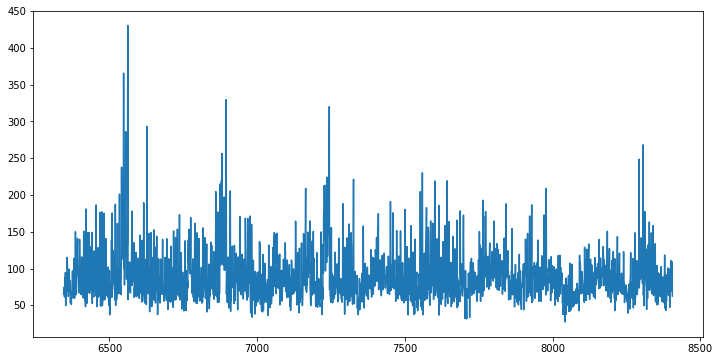

In [249]:
# plot some data using pandas
sales_df[sales_df['Group'] == (4)]['Sales'].plot(figsize=(12,6))

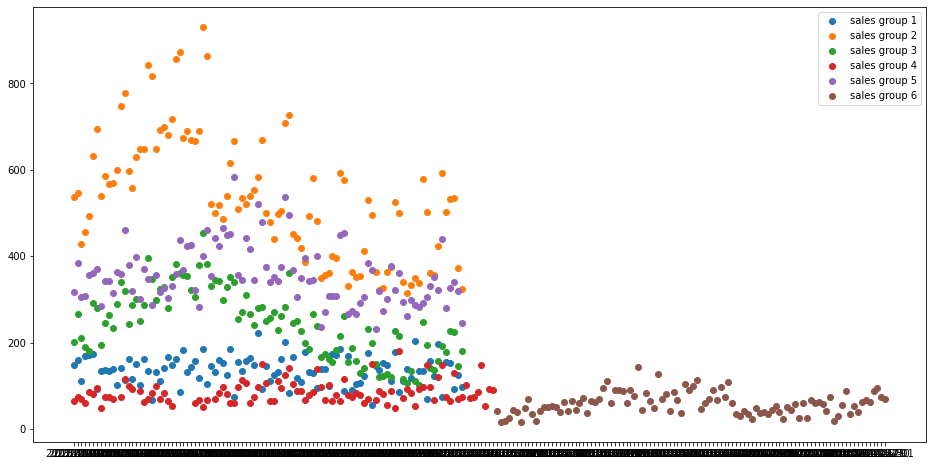

In [250]:
#plot 100 points of each sales group using matplotlib
plt.figure(figsize=(16,8))
for sale_nr in range(1, 7):
    current_sales = sales_df[sales_df['Group'] == (sale_nr)]
    plt.scatter(current_sales['Date'][0:100], current_sales['Sales'][0:100], label=f"sales group {sale_nr}")

plt.legend()

In [251]:
# Create a standard time frame using earliest date and most recent date
datetime = pd.date_range('2013-07-01', periods=2161, freq='D')
datetime

DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-07', '2013-07-08',
               '2013-07-09', '2013-07-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', length=2161, freq='D')

In [252]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
G1s = sales_df[sales_df['Group'] == (1)]
G1s = G1s.set_index(pd.to_datetime(G1s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G2s = sales_df[sales_df['Group'] == (2)]
G2s = G2s.set_index(pd.to_datetime(G2s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G3s = sales_df[sales_df['Group'] == (3)]
G3s = G3s.set_index(pd.to_datetime(G3s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G4s = sales_df[sales_df['Group'] == (4)]
G4s = G4s.set_index(pd.to_datetime(G4s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G5s = sales_df[sales_df['Group'] == (5)]
G5s = G5s.set_index(pd.to_datetime(G5s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G6s = sales_df[sales_df['Group'] == (6)]
G6s = G6s.set_index(pd.to_datetime(G6s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

In [253]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
kiwo_df = kiwo_df.set_index(pd.to_datetime(kiwo_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
kiwo_df

KielerWoche
2013-07-01          NaN
2013-07-02          NaN
2013-07-03          NaN
2013-07-04          NaN
2013-07-05          NaN
...                 ...
2019-05-27          NaN
2019-05-28          NaN
2019-05-29          NaN
2019-05-30          NaN
2019-05-31          NaN

[2161 rows x 1 columns]

In [254]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
weather_df = weather_df.set_index(pd.to_datetime(weather_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
weather_df

Cloudiness  Temperature  Wind Speed  Weather Code
2013-07-01         6.0      17.8375        15.0          20.0
2013-07-02         3.0      17.3125        10.0           NaN
2013-07-03         7.0      21.0750         6.0          61.0
2013-07-04         7.0      18.8500         7.0          20.0
2013-07-05         5.0      19.9750        12.0           NaN
...                ...          ...         ...           ...
2019-05-27         6.0      15.2625        13.0           NaN
2019-05-28         6.0      13.1625        12.0           NaN
2019-05-29         3.0      13.3625         8.0           0.0
2019-05-30         7.0      14.0125         9.0          61.0
2019-05-31         7.0      18.8500        14.0           NaN

[2161 rows x 4 columns]

In [255]:
# create a standard dataframe to contain all timeseries data
df_standard= pd.DataFrame(datetime, columns=['Date'])
df_standard = df_standard.set_index(df_standard['Date']).drop(['Date'], axis=1).asfreq(freq='D')
df_standard['G1_Sales']= np.nan
df_standard['G2_Sales']= np.nan
df_standard['G3_Sales']= np.nan
df_standard['G4_Sales']= np.nan
df_standard['G5_Sales']= np.nan
df_standard['G6_Sales']= np.nan
df_standard['Cloudiness']= np.nan
df_standard['Temperature']= np.nan
df_standard['Wind Speed']= np.nan
df_standard['Weather Code']= np.nan
df_standard['KielerWoche']= np.nan

df_standard

G1_Sales  G2_Sales  G3_Sales  G4_Sales  G5_Sales  G6_Sales  \
Date                                                                     
2013-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-03       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-04       NaN       NaN       NaN       NaN       NaN       NaN   
2013-07-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-05-27       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-28       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-29       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-30       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-31       NaN       NaN       NaN       NaN       NaN       NaN   

            Cloudiness  Temperature  Wind Speed  Weather Code  KielerWoche  
Date                                                                        
2013-07-01         NaN          NaN         NaN           NaN          NaN  
2013-07-02         NaN          NaN         NaN           NaN          NaN  
2013-07-03         NaN          NaN         NaN           NaN          NaN  
2013-07-04         NaN          NaN         NaN           NaN          NaN  
2013-07-05         NaN          NaN         NaN           NaN          NaN  
...                ...          ...         ...           ...          ...  
2019-05-27         NaN          NaN         NaN           NaN          NaN  
2019-05-28         NaN          NaN         NaN           NaN          NaN  
2019-05-29         NaN          NaN         NaN           NaN          NaN  
2019-05-30         NaN          NaN         NaN           NaN          NaN  
2019-05-31         NaN          NaN         NaN           NaN          NaN  

[2161 rows x 11 columns]

In [256]:
# consolidate all data into standard dataframe
for date in datetime:
    df_standard.loc[date]['G1_Sales'] = G1s.loc[date]['Sales']
    df_standard.loc[date]['G2_Sales'] = G2s.loc[date]['Sales']
    df_standard.loc[date]['G3_Sales'] = G3s.loc[date]['Sales']
    df_standard.loc[date]['G4_Sales'] = G4s.loc[date]['Sales']
    df_standard.loc[date]['G5_Sales'] = G5s.loc[date]['Sales']
    df_standard.loc[date]['G6_Sales'] = G6s.loc[date]['Sales']

    df_standard.loc[date]['Cloudiness'] = weather_df.loc[date]['Cloudiness']
    df_standard.loc[date]['Temperature'] = weather_df.loc[date]['Temperature']
    df_standard.loc[date]['Wind Speed'] = weather_df.loc[date]['Wind Speed']
    df_standard.loc[date]['Weather Code'] = weather_df.loc[date]['Weather Code']
    df_standard.loc[date]['KielerWoche'] = kiwo_df.loc[date]['KielerWoche']

df_standard

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
Date                                                                     
2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   
...                ...         ...         ...         ...         ...   
2019-05-27  135.089885  343.556064  148.559756  108.839265  319.487926   
2019-05-28  154.363980  325.469954  143.560611   69.413548  244.543724   
2019-05-29  190.850121  410.842197  150.235794   85.864240  261.402964   
2019-05-30   85.145930  577.007683  278.094458  109.264552  358.531072   
2019-05-31  215.454052  531.418072  238.703043   62.585166  290.409849   

            G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  \
Date                                                                      
2013-07-01       NaN         6.0      17.8375        15.0          20.0   
2013-07-02       NaN         3.0      17.3125        10.0           NaN   
2013-07-03       NaN         7.0      21.0750         6.0          61.0   
2013-07-04       NaN         7.0      18.8500         7.0          20.0   
2013-07-05       NaN         5.0      19.9750        12.0           NaN   
...              ...         ...          ...         ...           ...   
2019-05-27       NaN         6.0      15.2625        13.0           NaN   
2019-05-28       NaN         6.0      13.1625        12.0           NaN   
2019-05-29       NaN         3.0      13.3625         8.0           0.0   
2019-05-30       NaN         7.0      14.0125         9.0          61.0   
2019-05-31       NaN         7.0      18.8500        14.0           NaN   

            KielerWoche  
Date                     
2013-07-01          NaN  
2013-07-02          NaN  
2013-07-03          NaN  
2013-07-04          NaN  
2013-07-05          NaN  
...                 ...  
2019-05-27          NaN  
2019-05-28          NaN  
2019-05-29          NaN  
2019-05-30          NaN  
2019-05-31          NaN  

[2161 rows x 11 columns]

In [257]:
#replace all NAN values with 0
df_standard_ = df_standard.fillna(0)
df_standard_

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
Date                                                                     
2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   
...                ...         ...         ...         ...         ...   
2019-05-27  135.089885  343.556064  148.559756  108.839265  319.487926   
2019-05-28  154.363980  325.469954  143.560611   69.413548  244.543724   
2019-05-29  190.850121  410.842197  150.235794   85.864240  261.402964   
2019-05-30   85.145930  577.007683  278.094458  109.264552  358.531072   
2019-05-31  215.454052  531.418072  238.703043   62.585166  290.409849   

            G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  \
Date                                                                      
2013-07-01       0.0         6.0      17.8375        15.0          20.0   
2013-07-02       0.0         3.0      17.3125        10.0           0.0   
2013-07-03       0.0         7.0      21.0750         6.0          61.0   
2013-07-04       0.0         7.0      18.8500         7.0          20.0   
2013-07-05       0.0         5.0      19.9750        12.0           0.0   
...              ...         ...          ...         ...           ...   
2019-05-27       0.0         6.0      15.2625        13.0           0.0   
2019-05-28       0.0         6.0      13.1625        12.0           0.0   
2019-05-29       0.0         3.0      13.3625         8.0           0.0   
2019-05-30       0.0         7.0      14.0125         9.0          61.0   
2019-05-31       0.0         7.0      18.8500        14.0           0.0   

            KielerWoche  
Date                     
2013-07-01          0.0  
2013-07-02          0.0  
2013-07-03          0.0  
2013-07-04          0.0  
2013-07-05          0.0  
...                 ...  
2019-05-27          0.0  
2019-05-28          0.0  
2019-05-29          0.0  
2019-05-30          0.0  
2019-05-31          0.0  

[2161 rows x 11 columns]

In [258]:
#save standard dataframe as seperate combined dataset
df_standard_.to_csv(os.path.join(DATASET_FOLDER, 'combined_dataset.csv'))

In [259]:
# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

df = pd.read_csv(os.path.join(DATASET_FOLDER, 'combined_dataset.csv'))
# df.set_index(pd.to_datetime(df['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
df.set_index(pd.to_datetime(df['Date'])).asfreq(freq='D')

# conversion of dates
datetime = pd.to_datetime(df['Date'])
df.insert(0, 'datetime', datetime)

datetime_lim = [ df.datetime.min(), df.datetime.max() ] 
years_lim = [ df.datetime.min().year, df.datetime.max().year ]

def set_x_yearly(ax, days, start_year=2013):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1])
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)


G1_sales = df[['datetime', 'G1_Sales']].groupby('datetime').sum().squeeze()
G2_sales = df[['datetime', 'G2_Sales']].groupby('datetime').sum().squeeze()
G3_sales = df[['datetime', 'G3_Sales']].groupby('datetime').sum().squeeze()
G4_sales = df[['datetime', 'G4_Sales']].groupby('datetime').sum().squeeze()
G5_sales = df[['datetime', 'G5_Sales']].groupby('datetime').sum().squeeze()
G6_sales = df[['datetime', 'G6_Sales']].groupby('datetime').sum().squeeze()

Cloudiness = df[['datetime', 'Cloudiness']].groupby('datetime').sum().squeeze()
Temperature = df[['datetime', 'Temperature']].groupby('datetime').sum().squeeze()
Wind_Speed = df[['datetime', 'Wind Speed']].groupby('datetime').sum().squeeze()
Weather_Code = df[['datetime', 'Weather Code']].groupby('datetime').sum().squeeze()
KielerWoche = df[['datetime', 'KielerWoche']].groupby('datetime').sum().squeeze()


$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

Number of available days: 2161


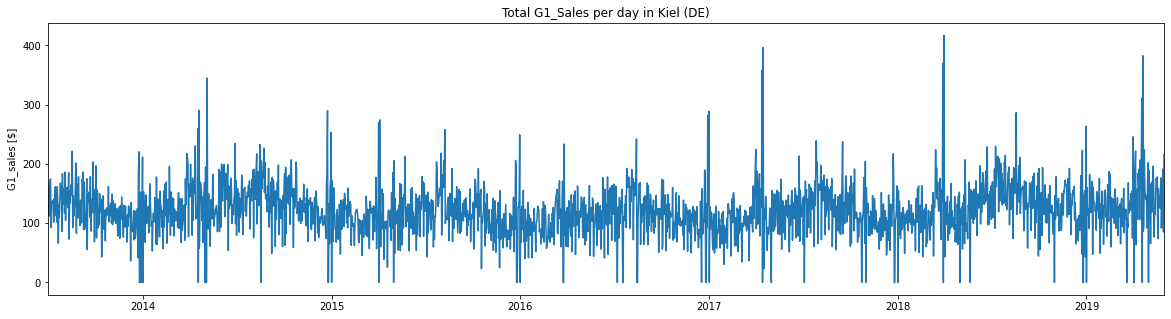

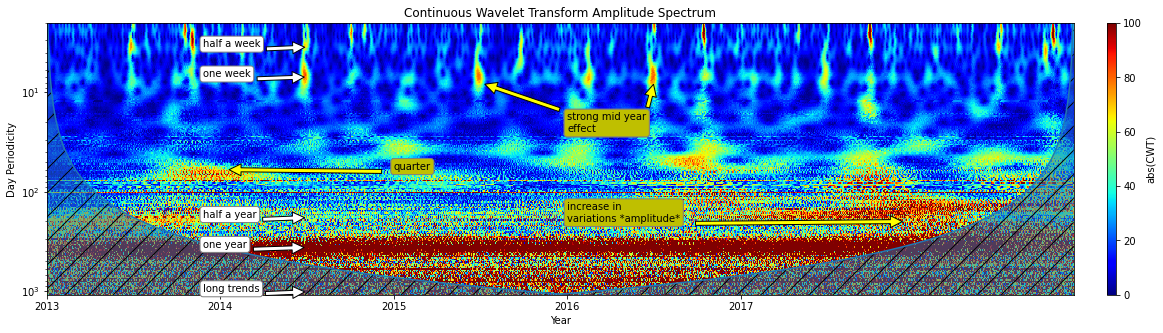

In [260]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G1_sales.index, G1_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G1_sales [$]"); plt.title("Total G1_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G1_sales_normed = G1_sales-G1_sales.mean()
ax = scg.cws(G1_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,100), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G1_sales_normed))
print("Number of available days:", len(G1_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Observations

    G1_sales per day : The G1_sales data shows no continuous periodic features as expected at the year scales and smaller ones
    The CWT reveals a lot of information in a short amount of time:

    A weekly variation showing the habits in the hospitals is present over several decades
        A second stripe at half a week is expected as the weekly patter is not an axact cosinus
        An increase in the weekly pattern is visible in the 80's which can be either caused by a change in the work habits of the hospitals, a change in birthrate or simple variation of the population
    A strong yearly trend is present which is a well known seasonal variation in the birthrates, humans are visibly prone to it ;)
        A second stripe at half a year is clearly a second harmonic
        Fuzzy patterns appears in the 3 to 1 month zone that could be due to a third harmonic, as tha yearly variation are so strong. It may also be caused by holiday impact on birth rate and may need further study
    An end-of-year effect has been spotted around christmas and January the 1st. This one may have remained unseen with other frequency based method.

    
The scaleogram has been

    Built from normalized data (mean removal)
    Log-scaled to be more readable at all scales

Adjusting the scales

The amplitude range of the color map (Z axis) is now set with the clim=(0,2500) parameter. The exact value for the amplitude of variations is dependent of the wavelet but will stay close to the order of the real value, see the cos wave plot for hints.

To see the yearly features an appropriate scales range is generated with period2scales().

    

Number of available days: 2161


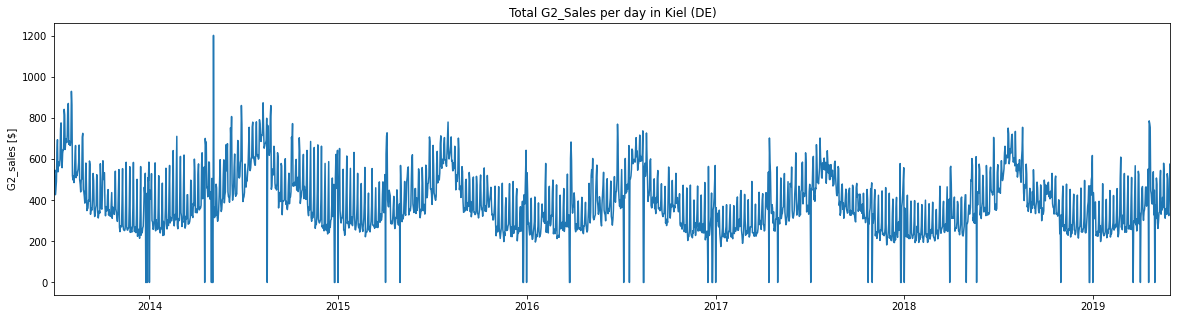

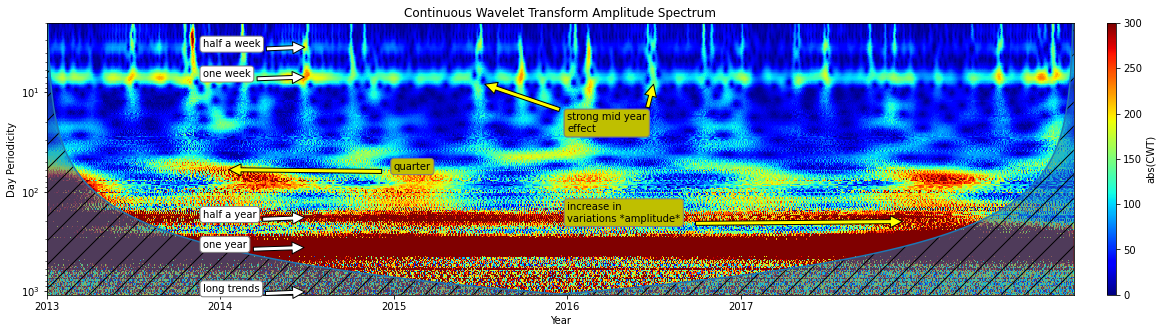

In [261]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G2_sales.index, G2_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G2_sales [$]"); plt.title("Total G2_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G2_sales_normed = G2_sales-G2_sales.mean()
ax = scg.cws(G2_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,300), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G2_sales_normed))
print("Number of available days:", len(G2_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


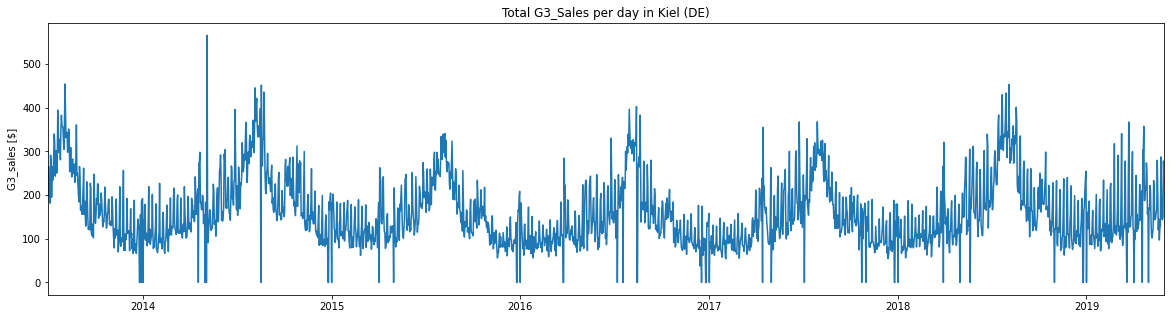

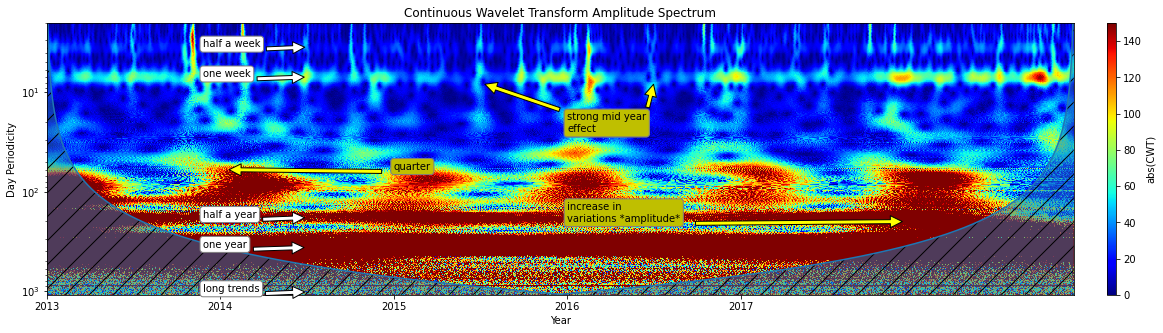

In [262]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G3_sales.index, G3_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G3_sales [$]"); plt.title("Total G3_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G3_sales_normed = G3_sales-G3_sales.mean()
ax = scg.cws(G3_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,150), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G3_sales_normed))
print("Number of available days:", len(G3_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


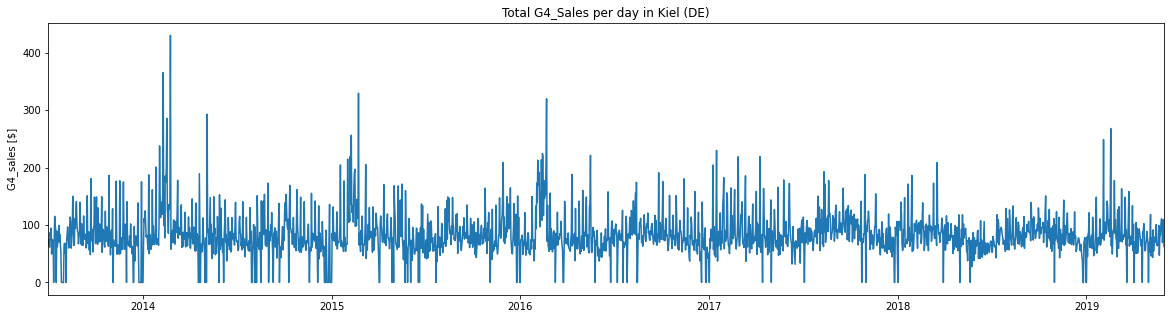

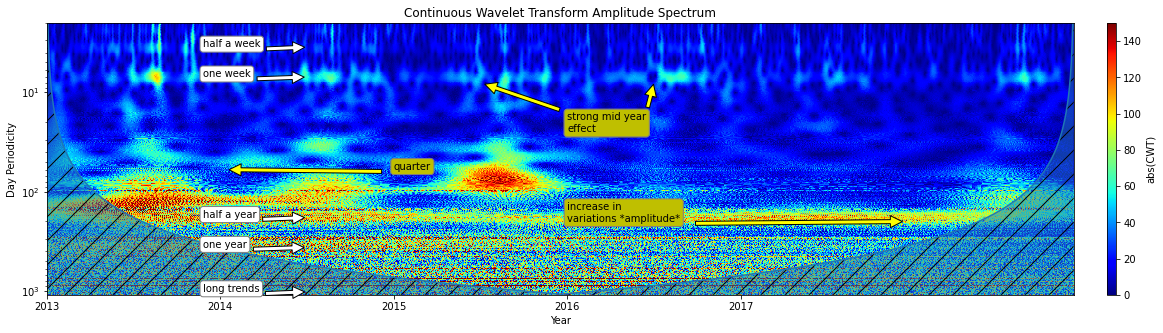

In [263]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G4_sales.index, G4_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G4_sales [$]"); plt.title("Total G4_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G4_sales_normed = G4_sales-G4_sales.mean()
ax = scg.cws(G4_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,150), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G4_sales_normed))
print("Number of available days:", len(G4_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


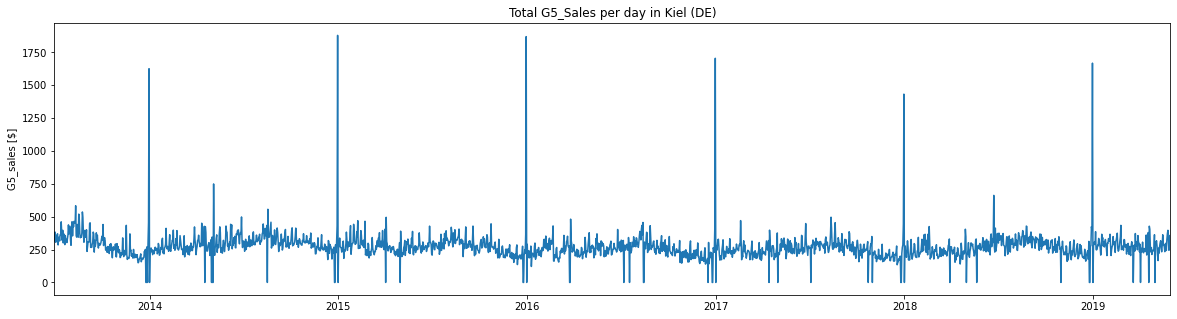

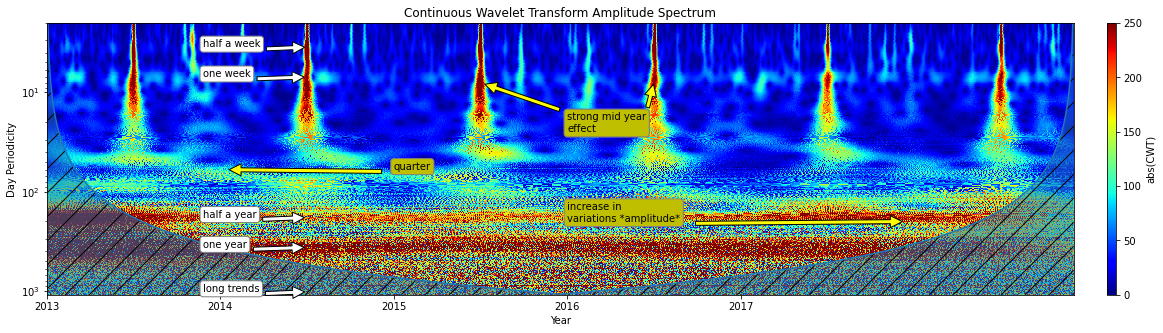

In [264]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G5_sales.index, G5_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G5_sales [$]"); plt.title("Total G5_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G5_sales_normed = G5_sales-G5_sales.mean()
ax = scg.cws(G5_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G5_sales_normed))
print("Number of available days:", len(G5_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


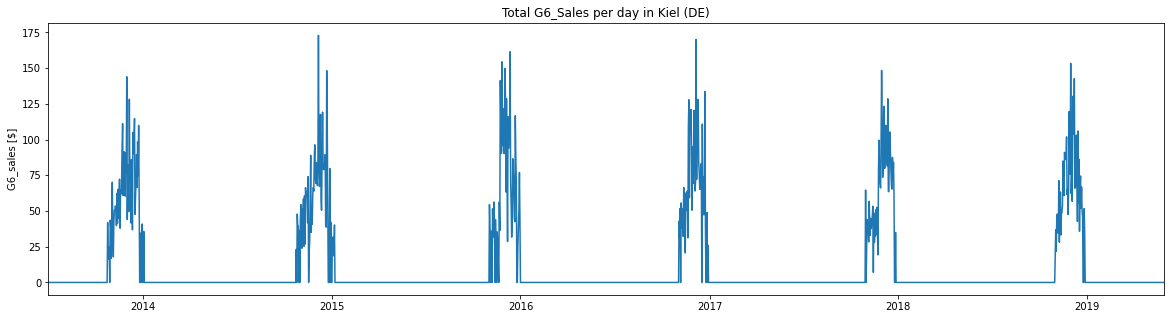

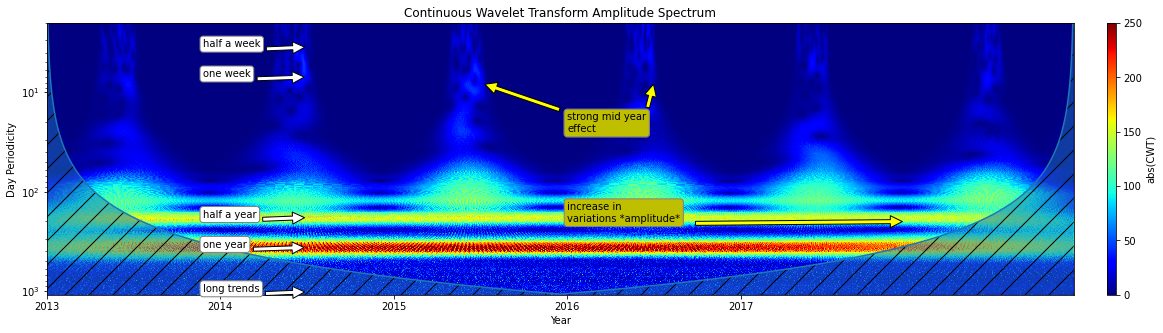

In [265]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G6_sales.index, G6_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G6_sales [$]"); plt.title("Total G6_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G6_sales_normed = G6_sales-G6_sales.mean()
ax = scg.cws(G6_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G6_sales_normed))
print("Number of available days:", len(G6_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



In [266]:
Cloudiness = df[['datetime', 'Cloudiness']].groupby('datetime').sum().squeeze()
Temperature = df[['datetime', 'Temperature']].groupby('datetime').sum().squeeze()
Wind_Speed = df[['datetime', 'Wind Speed']].groupby('datetime').sum().squeeze()
Weather_Code = df[['datetime', 'Weather Code']].groupby('datetime').sum().squeeze()
KielerWoche = df[['datetime', 'KielerWoche']].groupby('datetime').sum().squeeze()

Number of available days: 2161


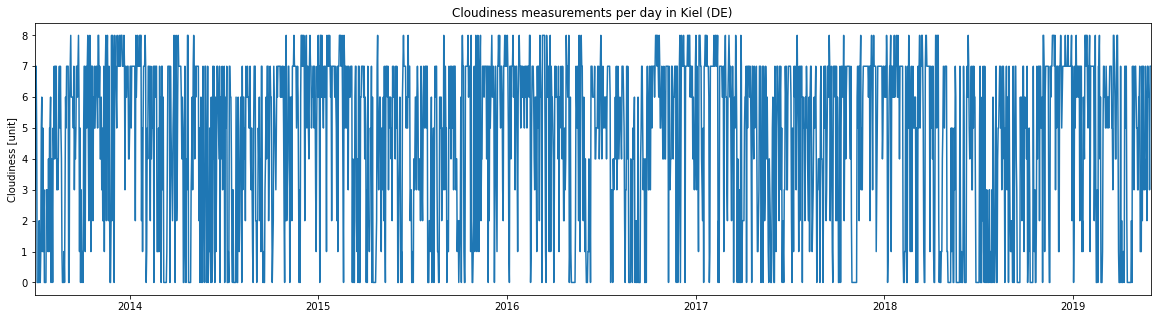

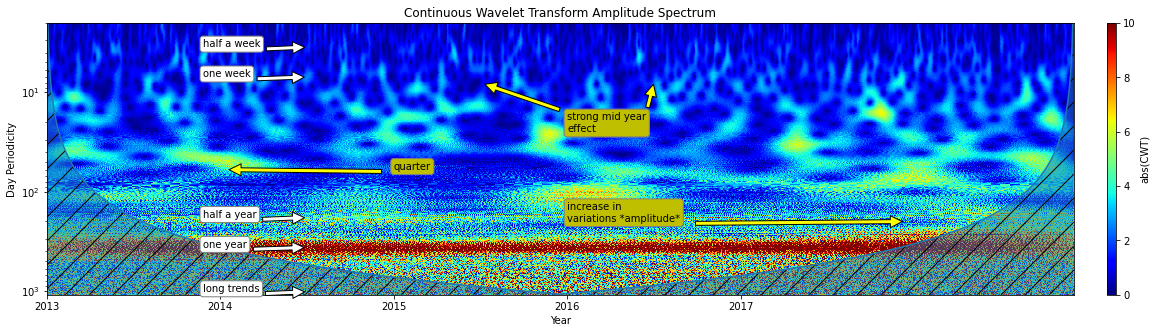

In [267]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Cloudiness.index, Cloudiness.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Cloudiness [unit]"); plt.title("Cloudiness measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Cloudiness_normed = Cloudiness-Cloudiness.mean()
ax = scg.cws(Cloudiness_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,10), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Cloudiness_normed))
print("Number of available days:", len(Cloudiness_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)



Number of available days: 2161


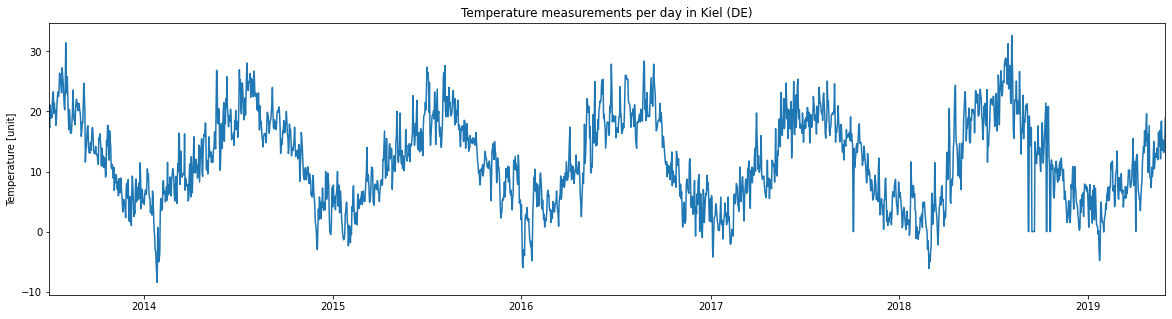

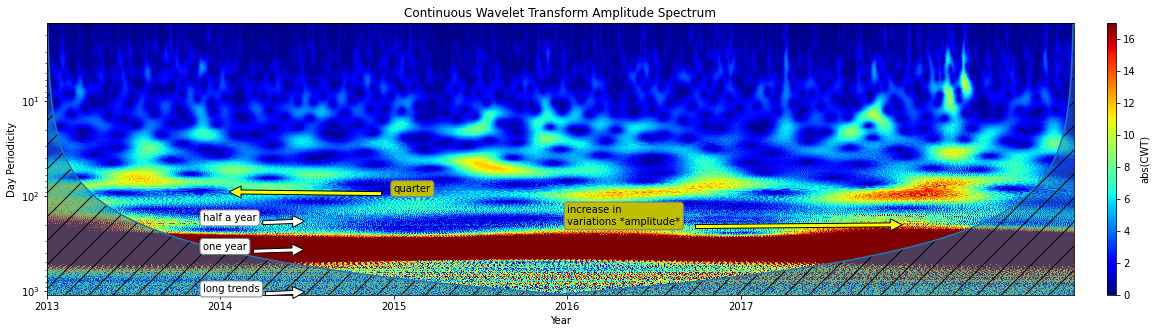

In [268]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Temperature.index, Temperature.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Temperature [unit]"); plt.title("Temperature measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(1.5), np.log10(365*3), 500))

Temperature_normed = Temperature-Temperature.mean()
ax = scg.cws(Temperature_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,17), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Temperature_normed))
print("Number of available days:", len(Temperature_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 90), xytext=(365*2, 90), 
                   bbox=bbox2, arrowprops=arrowprops2)

               
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

Number of available days: 2161


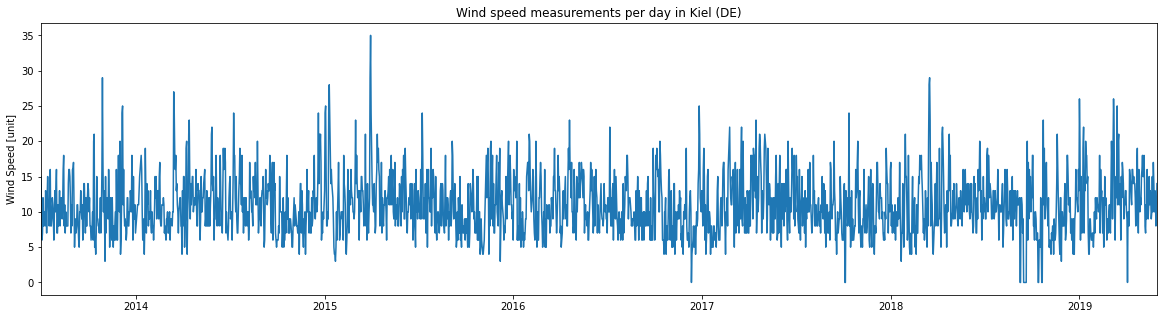

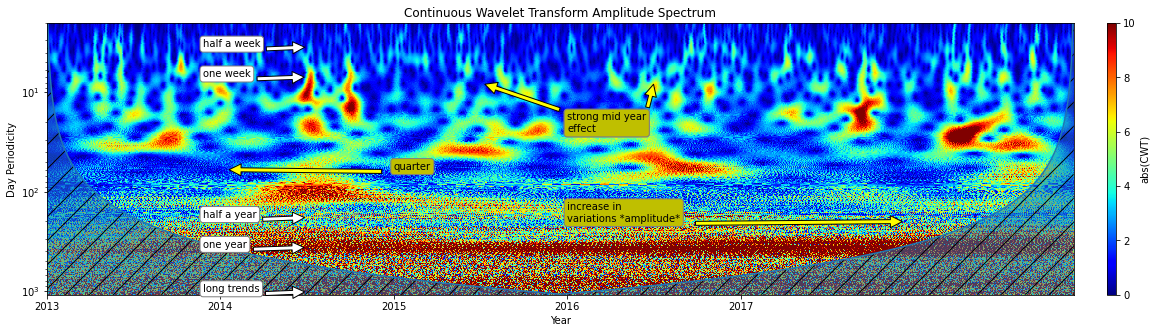

In [269]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Wind_Speed.index, Wind_Speed.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Wind Speed [unit]"); plt.title("Wind speed measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Wind_Speed_normed = Wind_Speed-Wind_Speed.mean()
ax = scg.cws(Wind_Speed_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,10), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Wind_Speed))
print("Number of available days:", len(Cloudiness_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

Number of available days: 2161


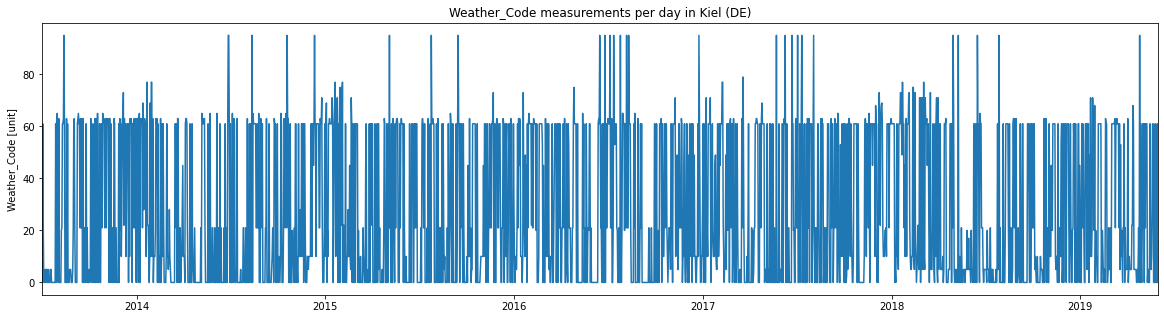

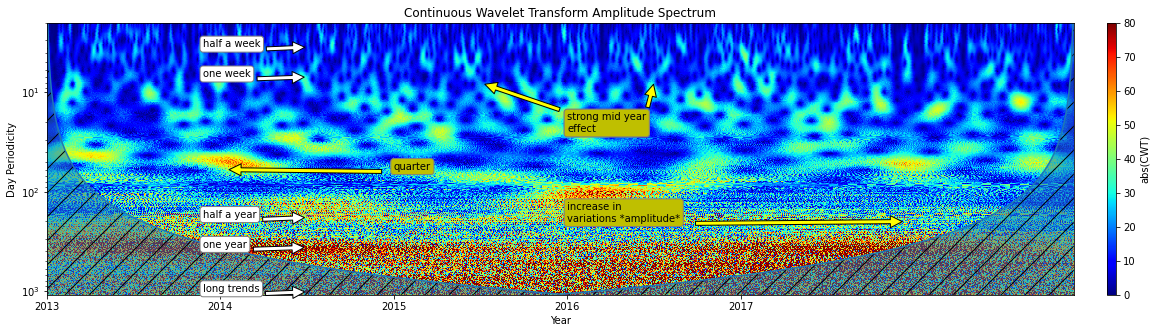

In [270]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Weather_Code.index, Weather_Code.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Weather_Code [unit]"); plt.title("Weather_Code measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Weather_Code_normed = Weather_Code-Weather_Code.mean()
ax = scg.cws(Weather_Code_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,80), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Weather_Code_normed))
print("Number of available days:", len(Weather_Code_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

Number of available days: 2161


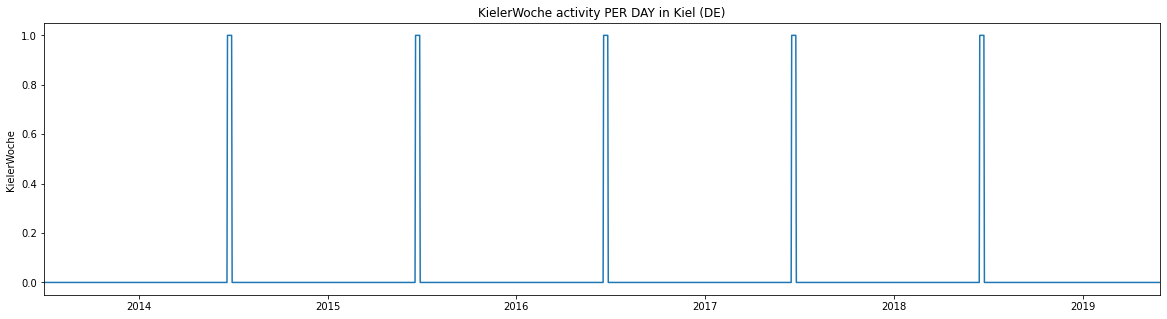

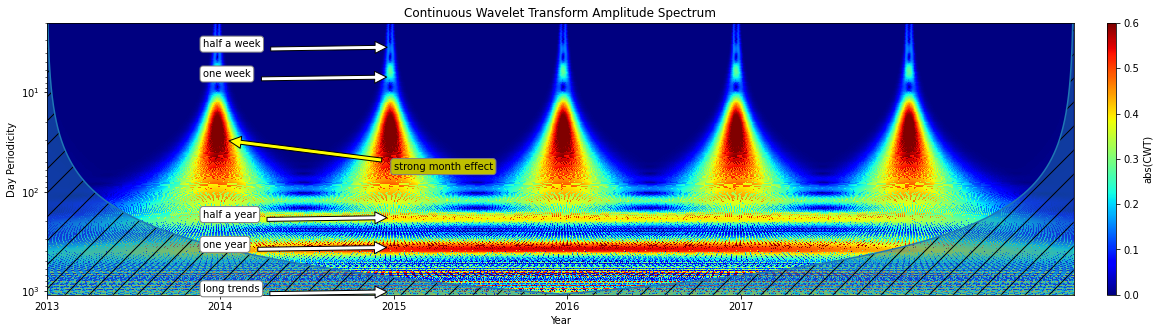

In [271]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(KielerWoche.index, KielerWoche.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("KielerWoche "); plt.title("KielerWoche activity PER DAY in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

KielerWoche_normed = KielerWoche-KielerWoche.mean()
ax = scg.cws(KielerWoche_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,.6), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(KielerWoche_normed))
print("Number of available days:", len(KielerWoche_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*2, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("strong month effect", xy=(365*1, 30), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

### Import Essential Libraries

In [272]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from numpy import genfromtxt
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
import pylab as pl
import seaborn as sns
from pathlib import Path
import shutil

### Import essential Tensorflow - Keras libraries

In [273]:
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model

if IN_COLAB:
  from tensorflow.keras.optimizers.legacy import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax
else:
  from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.keras.utils import plot_model, to_categorical, normalize
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


### Check for available GPUs and configure Tensorflow session to utilize GPU

In [274]:
try:
  # tf.debugging.experimental.enable_dump_debug_info('.', tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)
  # tf.debugging.set_log_device_placement(True)
  from tensorflow.python.client import device_lib

  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))

  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.gpu_options.per_process_gpu_memory_fraction = 0.1
  sess = tf.compat.v1.InteractiveSession(config=config)
  set_session(sess)
  print(device_lib.list_local_devices())
  gpus = tf.config.experimental.list_physical_devices('GPU')
  for gpu in gpus:
    try:
      tf.config.experimental.set_memory_growth(gpu, True)
      # Restrict TensorFlow to only use the first GPU
      tf.config.set_visible_devices(gpus[0], 'GPU')
      logical_gpus = tf.config.list_logical_devices('GPU')
      print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
      # Visible devices must be set before GPUs have been initialized
      print(e)

except Exception as error:
    print("Error trying to configure computing device.")
    print(error)

Found GPU at: /device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2908814926891927240
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14398783488
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11010934153704328229
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
1 Physical GPUs, 1 Logical GPU


/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Version Check: Tensorflow - Cuda - CuDNN 

In [275]:
from tensorflow.python.platform import build_info as tf_build_info
print("Tensorflow verison: ",tf.__version__)
print("CUDA verison: ", tf_build_info.build_info['cuda_version'])
print("CUDNN verison: ", tf_build_info.build_info['cudnn_version'])

Tensorflow verison:  2.11.0
CUDA verison:  11.2
CUDNN verison:  8


### Setup Tensorflow-GPU precision 
Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory. 

In [276]:
# tf.keras.backend.floatx()
# tf.keras.backend.set_floatx('float16')
# tf.keras.mixed_precision.experimental.set_policy('mixed_float16')
tf.keras.backend.floatx()

'float32'

### Import CSV Data with Pandas

In [277]:
file = os.path.join(DATASET_FOLDER, 'combined_dataset.csv')
# df.set_index(pd.to_datetime(df['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
# df.set_index(pd.to_datetime(df['Date'])).asfreq(freq='D')


myData = pd.read_csv(file, delimiter=',')
# myData.round(decimals=6)
# myData=myData.astype(np.float32)
# myData=myData.astype(np.float16)
myData.describe()

G1_Sales     G2_Sales     G3_Sales     G4_Sales     G5_Sales  \
count  2161.000000  2161.000000  2161.000000  2161.000000  2161.000000   
mean    121.609685   390.338363   160.825879    83.507887   272.267911   
std      44.238232   147.255653    78.134143    38.186990   105.985502   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      96.074649   281.658152   104.946089    64.441067   228.600351   
50%     121.022931   363.882395   142.385020    78.565833   266.290327   
75%     146.289692   482.354587   201.424733    96.534913   308.207385   
max     416.788764  1203.431130   565.941679   430.500089  1879.461831   

          G6_Sales   Cloudiness  Temperature   Wind Speed  Weather Code  \
count  2161.000000  2161.000000  2161.000000  2161.000000   2161.000000   
mean     10.821912     4.664044    11.825403    10.978714     27.353540   
std      27.823203     2.685187     7.190157     4.241387     28.144402   
min       0.000000     0.000000    -8.475000     0.000000      0.000000   
25%       0.000000     2.000000     6.125000     8.000000      0.000000   
50%       0.000000     6.000000    11.375000    10.000000     20.000000   
75%       0.000000     7.000000    17.650000    13.000000     61.000000   
max     172.865985     8.000000    32.671428    35.000000     95.000000   

       KielerWoche  
count  2161.000000  
mean      0.020824  
std       0.142827  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### Check Datatypes

In [278]:
# myData.convert_dtypes('float16')
myData.dtypes

Date             object
G1_Sales        float64
G2_Sales        float64
G3_Sales        float64
G4_Sales        float64
G5_Sales        float64
G6_Sales        float64
Cloudiness      float64
Temperature     float64
Wind Speed      float64
Weather Code    float64
KielerWoche     float64
dtype: object

### Check Shape of DataFrame

In [279]:
myData.shape

(2161, 12)

### List of features or signals used in the data-set.

In [280]:
data_top = myData.columns.values
data_top

array(['Date', 'G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales',
       'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed',
       'Weather Code', 'KielerWoche'], dtype=object)

### Display top rows of the DataFrame

In [281]:
myData.head()

Date    G1_Sales    G2_Sales    G3_Sales   G4_Sales    G5_Sales  \
0  2013-07-01  148.828353  535.856285  201.198426  65.890169  317.475875   
1  2013-07-02  159.793757  546.780787  265.261254  74.543917  383.628682   
2  2013-07-03  111.885594  427.343259  210.260241  69.262728  305.523072   
3  2013-07-04  168.864941  454.859641  190.686641  61.490175  308.408168   
4  2013-07-05  171.280754  492.818804  181.644870  86.759861  355.518770   

   G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  KielerWoche  
0       0.0         6.0      17.8375        15.0          20.0          0.0  
1       0.0         3.0      17.3125        10.0           0.0          0.0  
2       0.0         7.0      21.0750         6.0          61.0          0.0  
3       0.0         7.0      18.8500         7.0          20.0          0.0  
4       0.0         5.0      19.9750        12.0           0.0          0.0

### Display bottom rows of the DataFrame

In [282]:
myData.tail()

Date    G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
2156  2019-05-27  135.089885  343.556064  148.559756  108.839265  319.487926   
2157  2019-05-28  154.363980  325.469954  143.560611   69.413548  244.543724   
2158  2019-05-29  190.850121  410.842197  150.235794   85.864240  261.402964   
2159  2019-05-30   85.145930  577.007683  278.094458  109.264552  358.531072   
2160  2019-05-31  215.454052  531.418072  238.703043   62.585166  290.409849   

      G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  KielerWoche  
2156       0.0         6.0      15.2625        13.0           0.0          0.0  
2157       0.0         6.0      13.1625        12.0           0.0          0.0  
2158       0.0         3.0      13.3625         8.0           0.0          0.0  
2159       0.0         7.0      14.0125         9.0          61.0          0.0  
2160       0.0         7.0      18.8500        14.0           0.0          0.0

### Check for Missing Data 


In [283]:
# plt.figure(figsize=(30,5*16))
# myData.plot(subplots=True, figsize=(30,5*16))
# plt.grid(color='b', linestyle='-.', linewidth=0.5)
# plt.show()
myData.isnull().values.any()

False

### Plot a few signals 


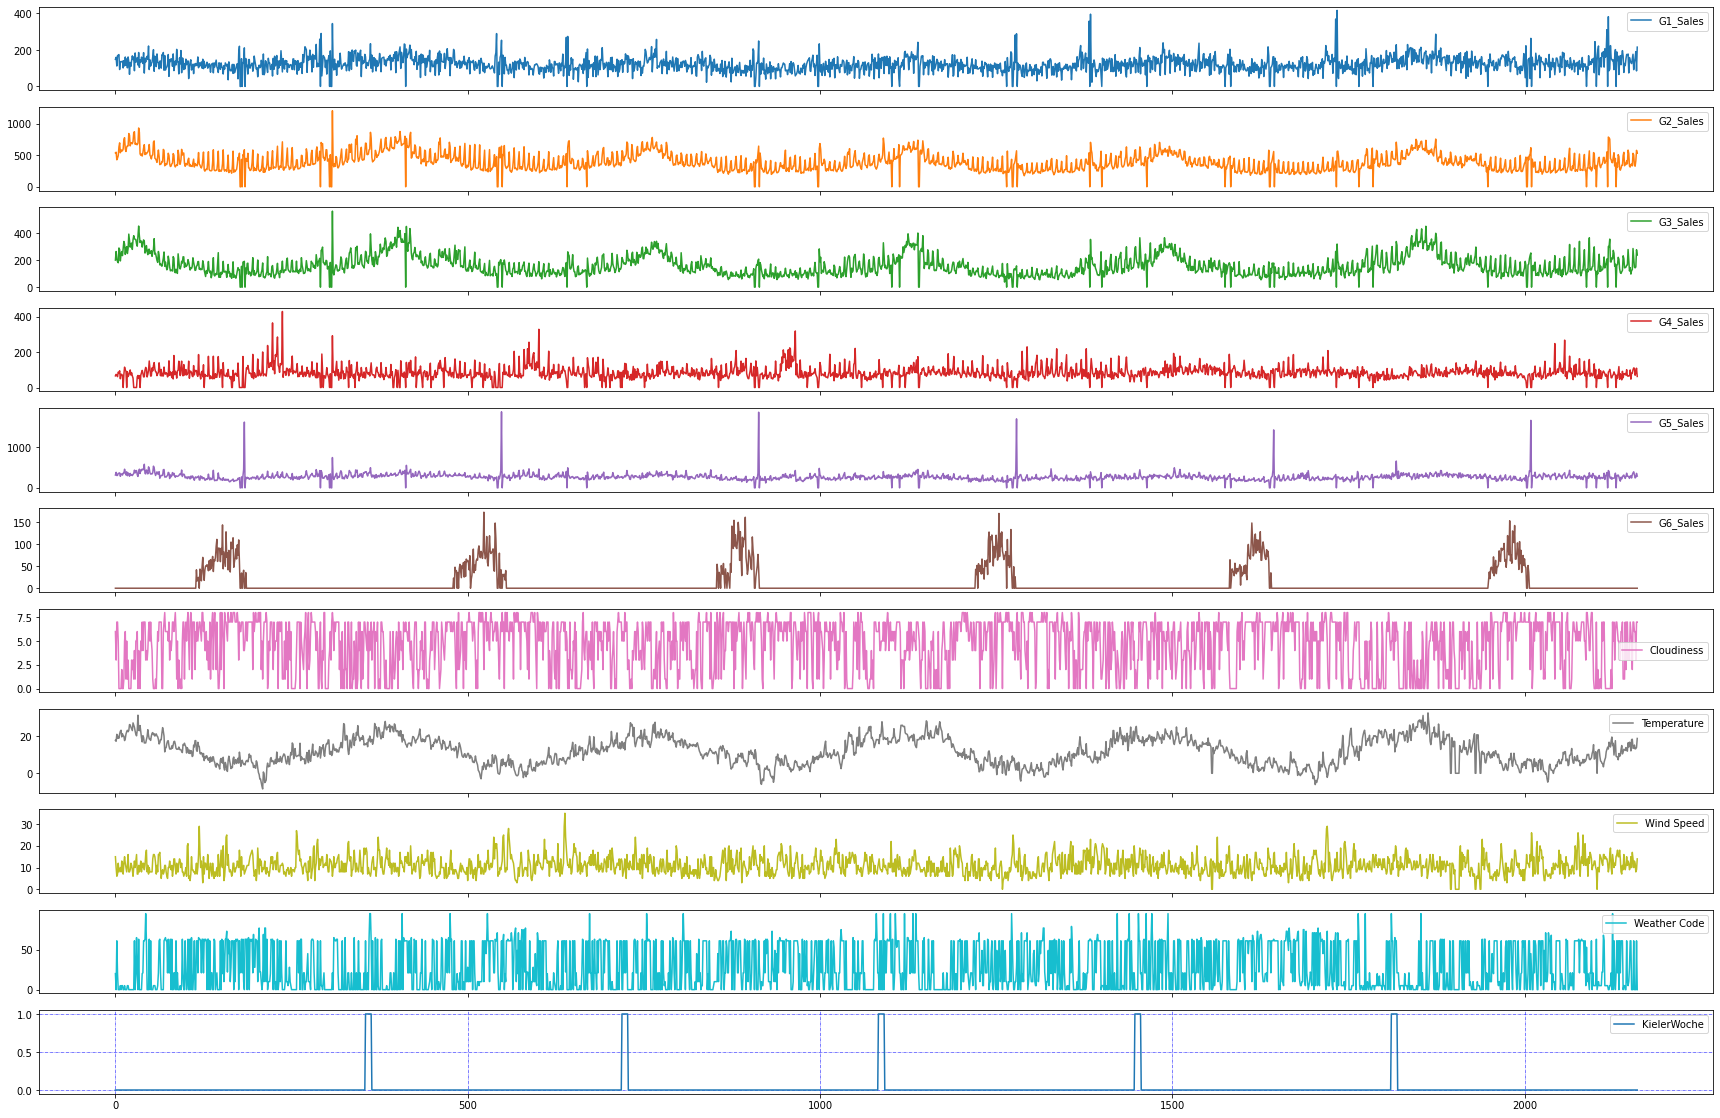

In [284]:
# plt.figure(figsize=(30,10))
myData.plot(subplots=True, figsize=(30,20))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.show()

### Input - Output Feature Selection

In [285]:
input_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 'KielerWoche']
target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']

### Attempting to Predict the future Target Features.

#### To achieve this we shift the target features by one timestep backward

In [286]:
shift_steps = 1

### Create a new DataFrame with the time-shifted data.

#### **Note the negative time-shift!**

In [287]:
df_targets = myData[target_names].shift(-shift_steps)
df_targets

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  G6_Sales
0     159.793757  546.780787  265.261254   74.543917  383.628682       0.0
1     111.885594  427.343259  210.260241   69.262728  305.523072       0.0
2     168.864941  454.859641  190.686641   61.490175  308.408168       0.0
3     171.280754  492.818804  181.644870   86.759861  355.518770       0.0
4     174.552360  631.906068  291.557960   80.646577  361.866933       0.0
...          ...         ...         ...         ...         ...       ...
2156  154.363980  325.469954  143.560611   69.413548  244.543724       0.0
2157  190.850121  410.842197  150.235794   85.864240  261.402964       0.0
2158   85.145930  577.007683  278.094458  109.264552  358.531072       0.0
2159  215.454052  531.418072  238.703043   62.585166  290.409849       0.0
2160         NaN         NaN         NaN         NaN         NaN       NaN

[2161 rows x 6 columns]

**WARNING!** You should double-check that you have shifted the data in the right direction! We want to predict the future, not the past!

The shifted data-frame is confusing because Pandas keeps the original time-stamps even though we have shifted the data. You can check the time-shift is correct by comparing the original and time-shifted data-frames.

This is the first `shift_steps + 5` rows of the original data-frame:

In [288]:
myData[target_names].head(shift_steps + 5)

G1_Sales    G2_Sales    G3_Sales   G4_Sales    G5_Sales  G6_Sales
0  148.828353  535.856285  201.198426  65.890169  317.475875       0.0
1  159.793757  546.780787  265.261254  74.543917  383.628682       0.0
2  111.885594  427.343259  210.260241  69.262728  305.523072       0.0
3  168.864941  454.859641  190.686641  61.490175  308.408168       0.0
4  171.280754  492.818804  181.644870  86.759861  355.518770       0.0
5  174.552360  631.906068  291.557960  80.646577  361.866933       0.0

The following is the `first 5 rows` of the time-shifted data-frame. This should be identical to the `last 5 rows` shown above from the original data, except for the time-stamp.

In [289]:
df_targets.head(5)

G1_Sales    G2_Sales    G3_Sales   G4_Sales    G5_Sales  G6_Sales
0  159.793757  546.780787  265.261254  74.543917  383.628682       0.0
1  111.885594  427.343259  210.260241  69.262728  305.523072       0.0
2  168.864941  454.859641  190.686641  61.490175  308.408168       0.0
3  171.280754  492.818804  181.644870  86.759861  355.518770       0.0
4  174.552360  631.906068  291.557960  80.646577  361.866933       0.0

The time-shifted data-frame has the same length as the original data-frame, but the last observations are `NaN` (not a number) because the data has been shifted backwards so we are trying to shift data that does not exist in the original data-frame.

In [290]:
df_targets.tail()

G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  G6_Sales
2156  154.363980  325.469954  143.560611   69.413548  244.543724       0.0
2157  190.850121  410.842197  150.235794   85.864240  261.402964       0.0
2158   85.145930  577.007683  278.094458  109.264552  358.531072       0.0
2159  215.454052  531.418072  238.703043   62.585166  290.409849       0.0
2160         NaN         NaN         NaN         NaN         NaN       NaN

### NumPy Arrays

We now convert the Pandas data-frames to NumPy arrays that can be input to the neural network. We also remove the last part of the numpy arrays, because the target-data has `NaN` for the shifted period, and we only want to have valid data and we need the same array-shapes for the input- and output-data.

These are the input-signals:

In [291]:
x_data = myData[input_names].values[:-shift_steps].astype(np.float32, casting='unsafe')
# x_data = myData[input_names].values
x_data

array([[148.82835, 535.85626, 201.19843, ...,  15.     ,  20.     ,
          0.     ],
       [159.79376, 546.78076, 265.26126, ...,  10.     ,   0.     ,
          0.     ],
       [111.8856 , 427.34326, 210.26024, ...,   6.     ,  61.     ,
          0.     ],
       ...,
       [154.36398, 325.46994, 143.56061, ...,  12.     ,   0.     ,
          0.     ],
       [190.85011, 410.8422 , 150.2358 , ...,   8.     ,   0.     ,
          0.     ],
       [ 85.14593, 577.0077 , 278.09445, ...,   9.     ,  61.     ,
          0.     ]], dtype=float32)

### Input Data Characteristics

In [292]:
print("X-data Type:", type(x_data))
print("X-data Dtype:", x_data.dtype)
print("X-data Shape:", x_data.shape)
print("X-data Infinite values:", np.isinf(x_data).any())
print("X-data NaN values:", np.isnan(x_data).any())

X-data Type: <class 'numpy.ndarray'>
X-data Dtype: float32
X-data Shape: (2160, 11)
X-data Infinite values: False
X-data NaN values: False


These are the output-signals (or target-signals):

In [293]:
y_data = df_targets.values[:-shift_steps].astype(np.float32, casting='unsafe')
# y_data = df_targets.values
y_data

array([[159.79376 , 546.78076 , 265.26126 ,  74.543915, 383.6287  ,
          0.      ],
       [111.8856  , 427.34326 , 210.26024 ,  69.262726, 305.52307 ,
          0.      ],
       [168.86494 , 454.85965 , 190.68665 ,  61.490177, 308.40817 ,
          0.      ],
       ...,
       [190.85011 , 410.8422  , 150.2358  ,  85.86424 , 261.40295 ,
          0.      ],
       [ 85.14593 , 577.0077  , 278.09445 , 109.26455 , 358.53107 ,
          0.      ],
       [215.45406 , 531.4181  , 238.70305 ,  62.585167, 290.40985 ,
          0.      ]], dtype=float32)

### Target Data Characteristics

In [294]:
print("Y-data Type:", type(y_data))
print("Y-data Dtype:", y_data.dtype)
print("Y-data Shape:", y_data.shape)
print("Y-data Infinite values:", np.isinf(y_data).any())
print("Y-data NaN values:", np.isnan(y_data).any())

Y-data Type: <class 'numpy.ndarray'>
Y-data Dtype: float32
Y-data Shape: (2160, 6)
Y-data Infinite values: False
Y-data NaN values: False


This is the number of observations (aka. data-points or samples) in the data-set:

In [295]:
num_data = len(x_data)
num_data

2160

### Define training, validation and testing sample size

In [296]:
batch_size = 32
sequence_length = 100
train_split = 0.9
num_train = int(train_split * num_data)
num_val = int(0.5*(num_data - num_train))
num_test = (num_data - num_train) - num_val
steps_per_epoch = int((num_train/batch_size)/40)
train_validation_steps = int((num_val/batch_size))
test_validation_steps = int((num_test/batch_size))
test_validation_steps = 1
print('num_train:',num_train, 'num_val:',num_val, 'num_test:',num_test)
print('steps_per_epoch:', steps_per_epoch)
print('train_validation_steps:', train_validation_steps, 'test_validation_steps:', test_validation_steps)

num_train: 1944 num_val: 108 num_test: 108
steps_per_epoch: 1
train_validation_steps: 3 test_validation_steps: 1


In [297]:
y_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(y_data)
x_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_data)

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=train_split, random_state=None, shuffle=False )
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1944, 11)
y_train shape: (1944, 6)
x_test shape: (216, 11)
y_test shape: (216, 6)


### Visualize Time Shifted Targets

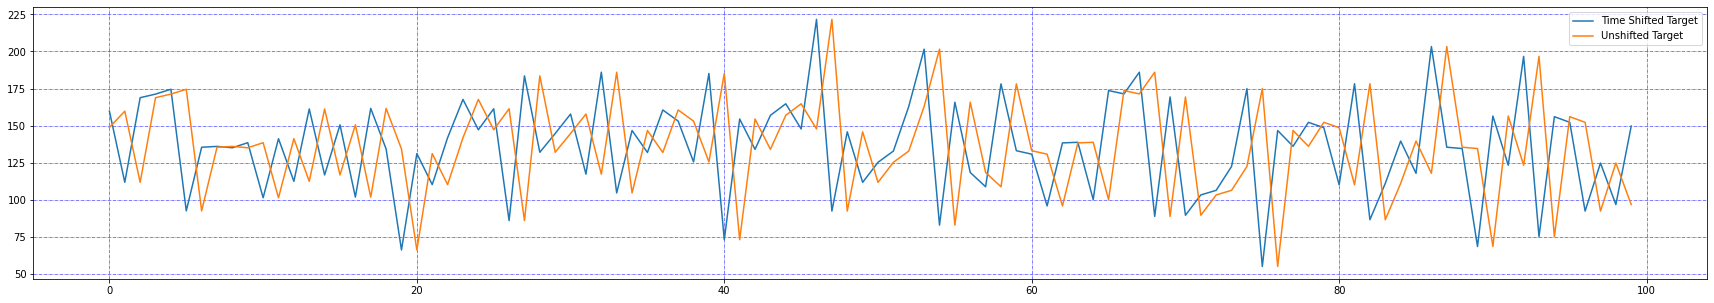

In [299]:
signal_ = 0  # First signal from the 20 input-signals.
seq = y_train[:100, signal_].reshape(-1,1)
seq1 = myData[target_names].values[:100, signal_].reshape(-1,1)
plt.figure(figsize=(30,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(np.concatenate((seq, seq1), axis=1))
plt.legend(['Time Shifted Target','Unshifted Target', ])
# np.concatenate((seq,seq1), axis=1)

This is the number of observations in the training-set:

In [300]:
num_train = len(x_train)
num_train

1944

This is the number of observations in the test-set:

In [301]:
num_test = len(x_test)
num_test

216

These is the total number of input observations for the training and test sets:

In [302]:
len(x_train) + len(x_test)

2160

These is the total number of output observations for the training and test sets:

In [303]:
len(y_train) + len(y_test)

2160

This is the number of input features:

In [304]:
num_x_signals = x_data.shape[1]
num_x_signals

11

This is the number of target features:

In [305]:
num_y_signals = y_data.shape[1]
num_y_signals

6

### Check Data Magnitudes

The data-set contains a wide range of values:

In [306]:
print('x_train min:', x_train.min())
print('x_train max:', x_train.max())

print('y_train min:', y_train.min())
print('y_train max:', y_train.max())

print('x_test min:', x_test.min())
print('x_test max:', x_test.max())

print('y_test min:', y_test.min())
print('y_test max:', y_test.max())

x_train min: -8.475
x_train max: 1879.4618
y_train min: 0.0
y_train max: 1879.4618
x_test min: -4.8125
x_test max: 1668.1244
y_test min: 0.0
y_test max: 1668.1244



## Check Train and Test Set Distribution


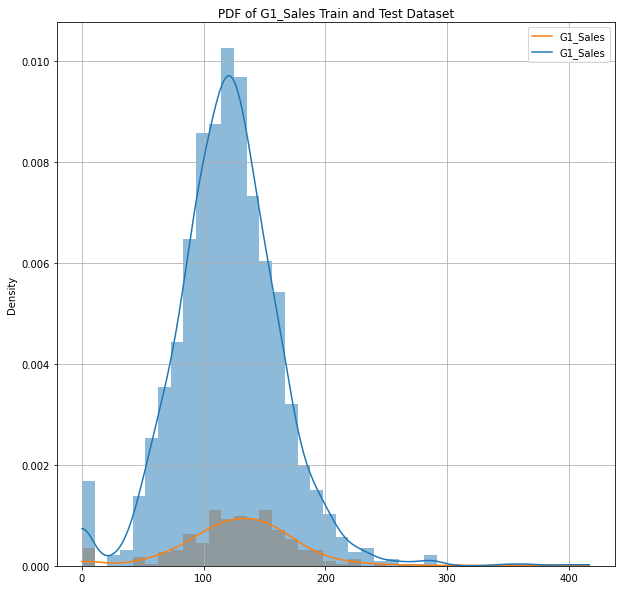

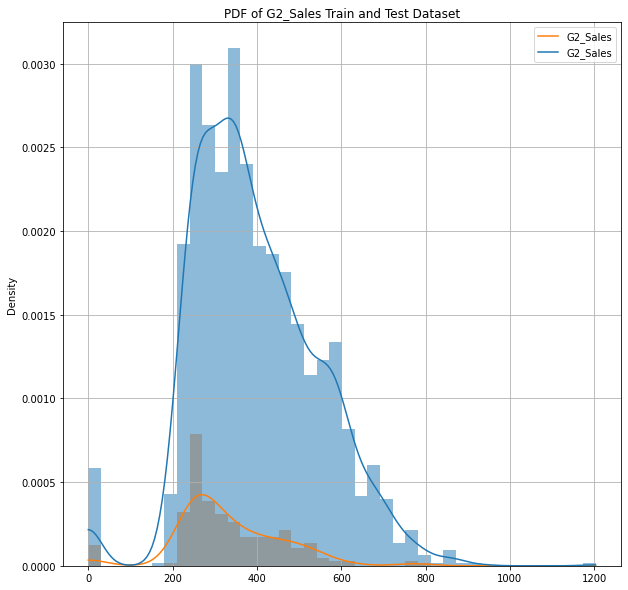

In [307]:
plt.figure(figsize=(10,10))
sns.histplot([y_train[:,0],y_test[:,0]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G1_Sales', 'G1_Sales'])
plt.title('PDF of G1_Sales Train and Test Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
sns.histplot([y_train[:,1],y_test[:,1]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G2_Sales', 'G2_Sales'])
plt.title('PDF of G2_Sales Train and Test Dataset')
plt.grid()
plt.show()


## Custom Tensorflow Data Generator 

The data-set has now been prepared as 2-dimensional numpy arrays. 

These are the array-shapes of the input and output data:

x_train shape:  (32, 100, 11) x_train dtype: float32
y_train0 shape:  (32, 1, 6) y_train dtype: float32
x_val shape:  (32, 100, 11) x_val dtype: float32
y_val0 shape:  (32, 1, 6) y_val dtype: float32
x_test shape:  (32, 100, 11) x_test dtype: float32
y_val0 shape:  (32, 1, 6) y_val dtype: float32


(False, False, False)

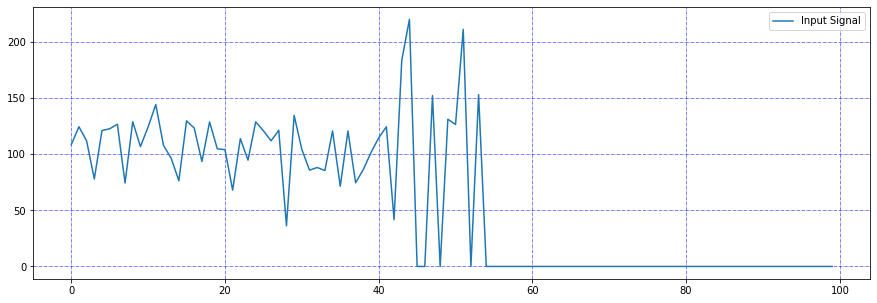

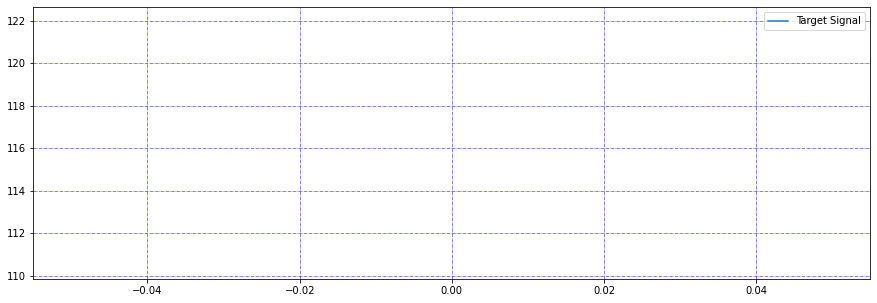

In [320]:
class CustomDataGen(tf.keras.utils.Sequence):
        
    def __init__ (self, x_data, y_data, batch_size=None, sequence_length=None, train=True, validation=True, random_batch=True, random_idx=False):
        
        self.x_train = x_data[0]
        self.x_test = x_data[1]        
        self.y_train = y_data[0]
        self.y_test = y_data[1]
        self.batch_size = batch_size
        self.sequence_length = sequence_length
        self.train = train
        self.validation = validation
        self.random_batch = random_batch
        self.random_idx = random_idx
        self.n = int(self.x_train.shape[0])
    
    def on_epoch_end(self):
        #do nothing
        return

    def __getitem__(self, index):
        if self.train:
            # print('using train samples')
            x_samples = self.x_train 
            y_samples = self.y_train 
            self.n = x_samples.shape[0]

        elif self.validation:
            # print('using validation samples')
            x_samples = self.x_test[:num_val]
            y_samples = self.y_test[:num_val]
            self.n = x_samples.shape[0]
        else:
            # print('using test samples')
            x_samples = self.x_test[-num_test:]
            y_samples = self.y_test[-num_test:]
            self.n = x_samples.shape[0]

            # Allocate a new array for the batch of input-signals.
        if self.train : #or self.validation
            sequence_length_ = np.random.randint(1,self.sequence_length)
        else:
            sequence_length_ = self.sequence_length
            # print(f"Sequence_length: {sequence_length_}")
        
        if self.random_batch:
            batch_size_ = np.random.randint(1,self.batch_size)
        else: 
            batch_size_ = batch_size
        
 
        x_shape = (batch_size_, self.sequence_length, x_samples.shape[1])
        y_shape = (batch_size_, 1, y_samples.shape[1])
        x_batch = np.zeros(shape=x_shape, dtype=np.float32)  
        y_batch = np.zeros(shape=y_shape, dtype=np.float32) 

            
        # Fill the batch with random sequences of data.
        for i in range(batch_size_):
            # Get a random start-index.
            idx = np.random.randint(self.n - sequence_length_)

            if self.random_idx:
                sample_idx = np.random.randint(1,x_samples.shape[-1])
            else:
                sample_idx = x_samples.shape[-1]

            # Inputs
            x_batch[i:, :sequence_length_, :] = x_samples[idx:idx+sequence_length_].reshape(-1,x_samples.shape[-1]) 
            
            # Outputs
            y_batch[i] = y_samples[idx+sequence_length_]  
       
        return x_batch, y_batch 
    
    def __len__(self):
        return int(self.n / self.batch_size)


x_train_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, train=True, validation=False, random_batch=False, random_idx=True)
x_train_batch, y_train_batch=x_train_generator.__getitem__(1)

print('x_train shape: ', x_train_batch.shape, 'x_train dtype:', x_train_batch.dtype)  
print('y_train0 shape: ', y_train_batch.shape, 'y_train dtype:', y_train_batch.dtype)


x_val_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, train=False, validation=True, random_batch=False, random_idx=True)
x_val_batch, y_val_batch=x_val_generator.__getitem__(1)

print('x_val shape: ', x_val_batch.shape, 'x_val dtype:', x_val_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


x_test_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, train=False, validation=False,  random_batch=False, random_idx=True)
x_test_batch, y_test_batch=x_test_generator.__getitem__(1)

print('x_test shape: ', x_test_batch.shape, 'x_test dtype:', x_test_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


batch = 0   # First sequence in the batch.
signal_ = 0  # First signal from the 20 input-signals.
seq = x_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Input Signal'])
seq = y_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Target Signal'])

  
np.isnan(x_train_batch).any(), np.isnan(x_val_batch).any(), np.isnan(x_test_batch).any()

## Implement Custom Loss Function

In [321]:
with tf.device('/device:GPU:0'):
    @tf.function( experimental_relax_shapes=True)
    def Custom_loss(y_true, y_pred):
        # Calculate the loss for each value in these tensors.
        # This outputs a 3-rank tensor of the same shape.
       
        loss_mse = tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=y_pred)
        loss_rmse = tf.math.sqrt(loss_mse)
        loss_mae = tf.keras.losses.mean_absolute_error(y_true=y_true, y_pred=y_pred)
        loss_mape = tf.keras.losses.mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
        loss_rmape = tf.math.sqrt(loss_mape)
        loss = tf.math.reduce_sum([loss_mse,loss_rmse,loss_mae,loss_rmape], axis=-1)
        
        loss = loss_mse+loss_rmse+loss_mae+loss_rmape
        loss_mean = tf.reduce_mean(loss)
        return loss_mean

# Build and Compile the GRU Sales Predicition Model

In [322]:
from keras.api._v2.keras.backend import batch_normalization
def create_GRU_model():
    inputs = layers.Input(name='Input_Layer', shape=(None, num_x_signals))

    # Extract Features
    Out1 = Bidirectional(GRU(name='H1', units=100, return_sequences=True, trainable = True), name='H1_Layer')(inputs)
    norm_Out1 = BatchNormalization()(Out1)
    Out2 = Bidirectional(GRU(name='H2', units=100, return_sequences=True, trainable = True), name='H2_Layer')(norm_Out1)
    norm_Out2 = BatchNormalization()(Out2)
    Out3 = Bidirectional(GRU(name='H3', units=100, return_sequences=True, trainable = True), name='H3_Layer')(norm_Out2)
    norm_Out3 = BatchNormalization()(Out3)
    Out4 = Bidirectional(GRU(name='H4', units=100, return_sequences=True, trainable = True), name='H4_Layer')(norm_Out3)
    norm_Out4 = BatchNormalization()(Out4)
    Out5 = Bidirectional(GRU(name='H5', units=100, return_sequences=True, trainable = True), name='H5_Layer')(norm_Out4)
    norm_Out5 = BatchNormalization()(Out5)
    Out6 = Bidirectional(GRU(name='H6', units=num_y_signals, return_sequences=False, trainable = True), name='H6_Layer')(norm_Out5)
    norm_Out6 = BatchNormalization()(Out6)
    
    # Predict output from features
    Y_initializer = tf.keras.initializers.RandomNormal(mean=myData[target_names].describe()[1:3].values[0], stddev=myData[target_names].describe()[1:3].values[1].transpose())
    rescaled_out = Dense(num_y_signals, name='SCALE_In', activation='linear', kernel_initializer=Y_initializer, use_bias=False)(norm_Out6)
    outputs = Reshape(name='Output', target_shape=(-1, num_y_signals))(rescaled_out)
        
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs, name='GRU_Sales_Model')

    # Create Optimizer.
    learning_rate = 0.1
    first_decay_steps = 1000
    lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(learning_rate, first_decay_steps)
    optimizer = Adam(learning_rate=learning_rate, amsgrad=True)
    # moving_avg_Adam = tfa.optimizers.MovingAverage(optimizer)
    stocastic_avg_Adam = tfa.optimizers.SWA(optimizer) 
    
    model.compile(loss=Custom_loss, optimizer=optimizer, metrics=['mse','acc', 'mae', 'mape'], run_eagerly=True)
    model.build((None, None, num_x_signals))

    return model

GRU_Sales_model = create_GRU_model()

GRU_Sales_model.summary()

Model: "GRU_Sales_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, None, 11)]        0         
                                                                 
 H1_Layer (Bidirectional)    (None, None, 200)         67800     
                                                                 
 batch_normalization_102 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 H2_Layer (Bidirectional)    (None, None, 200)         181200    
                                                                 
 batch_normalization_103 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 H3_Layer (Bidirectional)    (None, None, 200)     

# Plot GRU Sales model

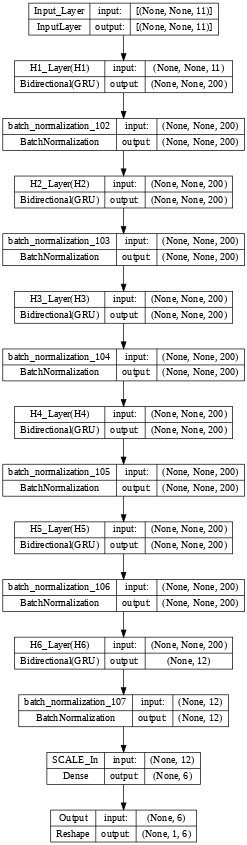

In [323]:
plot_model(GRU_Sales_model, show_shapes=True, to_file=os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.png'), show_layer_names=True, rankdir='TB', expand_nested=True, dpi=50)


## Implement Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.
This is the callback for writing checkpoints during training.

In [324]:
path_checkpoint = os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5')
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=False,
                                      restore_best_weights=True,
                                      save_best_only=True)

path_checkpoint_MA = os.path.join(DATA_FOLDER, r'model/GRU_Sales_MA.h5')
path_checkpoint_SWA = os.path.join(DATA_FOLDER, r'model/GRU_Sales_SWA.h5')

callback_MA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_MA, 
                                                    monitor='val_mse',
                                                    update_weights=True)

callback_SWA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_SWA,
                                                    monitor='val_mse',
                                                    update_weights=True)

This is the callback for stopping the optimization when performance worsens on the validation-set.

In [325]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=400, verbose=1)

This is the callback for writing the TensorBoard log during training.

In [326]:
dirpaths = [Path(os.path.join(DATA_FOLDER, r'model/Tensorboard/'))]

for dirpath in dirpaths:
    if dirpath.exists() and dirpath.is_dir():
        try:        
            shutil.rmtree(dirpath, ignore_errors=True)
            os.chmod(dirpath, 0o777)
            os.rmdir(dirpath)
            os.removedirs(dirpath)
            print("Directory '%s' has been removed successfully", dirpath)
        except OSError as error:
            print(error)
            print("Directory '%s' can not be removed", dirpath)
            
callback_tensorboard = TensorBoard(log_dir=os.path.join(DATA_FOLDER, r'model/Tensorboard/'),
                                   histogram_freq=1,
                                   write_graph=True)
                                #  profile_batch = '500,520')

[Errno 2] No such file or directory: 'data/model/Tensorboard'
Directory '%s' can not be removed data/model/Tensorboard


This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by `patience=10`). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-3 above, so multiplying it by 0.95 gives a learning-rate of 9.5e-4. We don't want the learning-rate to go any lower 1e-5

In [327]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.99,
                                       min_lr=1e-7,
                                       patience=5,
                                       verbose=1)    

In [328]:
# !tensorboard --logdir logs/ --bind_all --port=8080

In [329]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
            #callback_SWA,
             callback_reduce_lr]

#### Load weights from last checkpoint

In [330]:
filepath = path_checkpoint
def train_model(resume, epochs, initial_epoch, batch_size, model):
    def fit_model():
        with tf.device('/device:GPU:0'):
            print(model.summary())
            history=model.fit(x_train_generator, 
                              steps_per_epoch=steps_per_epoch, 
                              epochs=EPOCHS, 
                              verbose=1, 
                              callbacks=callbacks,
                              validation_data=x_val_generator, 
                              validation_steps=train_validation_steps, 
                              #validation_freq=5,
                              #class_weight=None, 
                              #max_queue_size=10, 
                              #workers=8, 
                              #use_multiprocessing=True,
                              #shuffle=True, 
                              initial_epoch=initial_epoch)
            model.load_weights(path_checkpoint)            
            model.save(filepath)
            model.evaluate(x_test_generator, steps=test_validation_steps)
        
            return history
    
    if resume:
        try:
            #del model
            model = load_model(filepath, custom_objects = {"Custom_loss":Custom_loss})
            # model.load_weights(path_checkpoint)
            print(model.summary())
            print("Model loading....")
            model.evaluate(x_test_generator, steps=test_validation_steps)
            
        except Exception as error:
            print("Error trying to load checkpoint.")
            print(error)
        
    # Training the Model
    return fit_model()
    
with tf.device('/device:GPU:0'):
    def plot_train_history(history, title):
        loss = history.history['loss']
        accuracy = history.history['acc']
        mape = history.history['mape']
        mae = history.history['mae']
        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_acc']
        val_mae = history.history['val_mae']
        val_mape = history.history['val_mape']
        epochs = range(len(loss))
        plt.figure(figsize=(30,5))
        plt.plot(epochs, loss, label='training_loss') 
        plt.plot(epochs, val_loss, label='validation_loss')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, accuracy, label='training_accuracy') 
        plt.plot(epochs, val_accuracy, label='validation_accuracy')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mae, label='training_mae') 
        plt.plot(epochs, val_mae, label='validation_mae')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mape, label='training_mape') 
        plt.plot(epochs, val_mape, label='validation_mape')
        plt.show()
        return



## Train Model

In [ ]:
EPOCHS = 1000

steps_per_epoch = int((num_train/batch_size))

for _ in range(1):
  try:
    GRU_Sales_model.load_weights(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"Custom_loss":Custom_loss})
    GRU_Sales_model.save(filepath)
    GRU_Sales_model = load_model(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"Custom_loss":Custom_loss})
    print("Checkpoint Loaded")  
  except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)
    
# Train model
with tf.device('/device:GPU:0'):
    history = train_model(resume=False, epochs=EPOCHS, initial_epoch=0, batch_size=batch_size, model=GRU_Sales_model)
    plot_train_history(history, 'Model Training History')
    GRU_Sales_model.history

Checkpoint Loaded
Model: "GRU_Sales_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, None, 11)]        0         
                                                                 
 H1_Layer (Bidirectional)    (None, None, 200)         67800     
                                                                 
 batch_normalization_102 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 H2_Layer (Bidirectional)    (None, None, 200)         181200    
                                                                 
 batch_normalization_103 (Ba  (None, None, 200)        800       
 tchNormalization)                                               
                                                                 
 H3_Layer (Bidirectional)    (Non

### Load Checkpoint

Because we use early-stopping when training the model, it is possible that the model's performance has worsened on the test-set for several epochs before training was stopped. We therefore reload the last saved checkpoint, which should have the best performance on the test-set.

In [ ]:
with tf.device('/device:GPU:0'):
    try:
        GRU_Sales_model = load_model(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"Custom_loss":Custom_loss})
        GRU_Sales_model.load_weights(os.path.join(DATA_FOLDER, r'model/GRU_Sales_model.h5'), {"Custom_loss":Custom_loss})
        print("Checkpoint Loaded")
    except Exception as error:
        print("Error trying to load checkpoint.")
        print(error)

## Performance on Test-Set

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence.

In [ ]:
with tf.device('/device:GPU:0'):
    GRU_Sales_model.evaluate(x_train_generator, steps=train_validation_steps)
    GRU_Sales_model.evaluate(x_val_generator, steps=train_validation_steps)
    GRU_Sales_model.evaluate(x_test_generator, steps=test_validation_steps)

In [ ]:
warmup_steps = 0
start_idx = 10
test_length = 100
rho = 0.05
sr = 10000

with tf.device('/device:GPU:0'):
        mape = tf.keras.losses.MeanAbsolutePercentageError()
        input_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales', 'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 'KielerWoche']
        target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']
        sequence_length = 30

        x_true = np.zeros(shape=(test_length,num_x_signals))
        y_pred = np.zeros(shape=(test_length,num_y_signals))
        y_true = np.zeros(shape=(test_length,num_y_signals))

        for i in tqdm_notebook(range(start_idx,start_idx+test_length), desc='Loop 1'):
                x = x_test[i:i+sequence_length].reshape(1,sequence_length,-1).reshape(1,sequence_length,-1)
                y_true[i-start_idx] = y_test[i+sequence_length].reshape(1,-1)
                y_pred[i-start_idx] = GRU_Sales_model.predict(x)

        x_true = x_test[start_idx:start_idx+test_length]

        # y_true = y_scaler.inverse_transform(y_true[:,:])   
        # y_pred = y_scaler.inverse_transform(y_pred[:,:])


for signal_ in tqdm_notebook(range(len(target_names)), desc='Loop 1'):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred[:, signal_]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal_]
        
        error = np.zeros(len(signal_true))
        p_error = np.zeros(len(signal_true))

        for i in range(len(signal_true)):
            error[i] = signal_true[i]-signal_pred[i]
            p_error[i] = mape((signal_true[i]+max(signal_true)).reshape(-1,1), (signal_pred[i]+max(signal_true)).reshape(-1,1))


        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()
        
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(error, label='Error')
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(p_error, label='Error Percent')        
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()